In [ ]:
from google.colab import files


uploaded = files.upload()

Saving TEST_TASK_REPLACEMENT_UPDATE 1.xlsx to TEST_TASK_REPLACEMENT_UPDATE 1.xlsx


In [ ]:
import pandas as pd
file_path = '/content/TEST_TASK_REPLACEMENT_UPDATE 1.xlsx'

df = pd.read_excel(file_path)
print(df.head())

     код_клиента  код_обращения дата_обращения              решение категория  \
0  CUST-10036878  REPL-23821368     2022-01-30  WarrantyReplacement      B101   
1  CUST-10041283  REPL-23930020     2022-02-08  WarrantyReplacement      B101   
2  CUST-10042118  REPL-24541731     2022-03-30  WarrantyReplacement      B101   
3  CUST-10046075  REPL-23620065     2022-01-16  WarrantyReplacement      B101   
4  CUST-10048037  REPL-23773156     2022-01-27  WarrantyReplacement      B101   

   возраст_устройства      платформа   цвет      тип код_доставки  \
0                 3.0    IQOS 3 DUOS   Blue   Holder          NaN   
1                12.0    IQOS 3 DUOS  Black  Charger          NaN   
2                 9.0    IQOS 3 DUOS   Gold  Charger          NaN   
3                24.0    IQOS 3 DUOS   Gold   Holder          NaN   
4                 4.0  IQOS 2.4/2.4+   Navy      Kit          NaN   

  тип_доставки канал  регион         город   nps  
0          NaN    TT   North         Kirov  Det

In [ ]:
print("Типы данных в колонках:")
print(df.dtypes)

Типы данных в колонках:
код_клиента                   object
код_обращения                 object
дата_обращения        datetime64[ns]
решение                       object
категория                     object
возраст_устройства           float64
платформа                     object
цвет                          object
тип                           object
код_доставки                  object
тип_доставки                  object
канал                         object
регион                        object
город                         object
nps                           object
dtype: object


In [ ]:
if sum(df.duplicated()) == 0:
    print("Дубликатов не обнаружено")
else:
    print("Обнаружены дубликаты")

Дубликатов не обнаружено


In [ ]:
if sum(df.isnull().values.ravel()) == 0:
    print("Пропусков не обнаружено")
else:
    print("Обнаружены пропуски")

Обнаружены пропуски


In [ ]:
missing_values = df.isnull()
print(missing_values.sum())
print(df[missing_values.any(axis=1)])

код_клиента               8
код_обращения             0
дата_обращения            0
решение                   0
категория                 0
возраст_устройства       36
платформа                 0
цвет                      0
тип                       0
код_доставки          80747
тип_доставки          80751
канал                     0
регион                    0
город                     0
nps                       0
dtype: int64
         код_клиента  код_обращения дата_обращения              решение  \
0      CUST-10036878  REPL-23821368     2022-01-30  WarrantyReplacement   
1      CUST-10041283  REPL-23930020     2022-02-08  WarrantyReplacement   
2      CUST-10042118  REPL-24541731     2022-03-30  WarrantyReplacement   
3      CUST-10046075  REPL-23620065     2022-01-16  WarrantyReplacement   
4      CUST-10048037  REPL-23773156     2022-01-27  WarrantyReplacement   
...              ...            ...            ...                  ...   
88102  CUST-33955845  REPL-24555428     20

In [ ]:
grouped = df.groupby(df['дата_обращения'].dt.month).size()
result = grouped[(grouped.index >= 1) & (grouped.index <= 3)]
print(result)
total_count = result.loc[[1, 2, 3]].sum()
print(f"Суммарное количество обращений за январь, февраль, март: {total_count}")

дата_обращения
1    30396
2    27507
3    30204
dtype: int64
Суммарное количество обращений за январь, февраль, март: 88107


In [ ]:
count = df[(df['тип'] == 'Kit') & (df['решение'] == 'WarrantyReplacement')].shape[0]
print(count)


6070


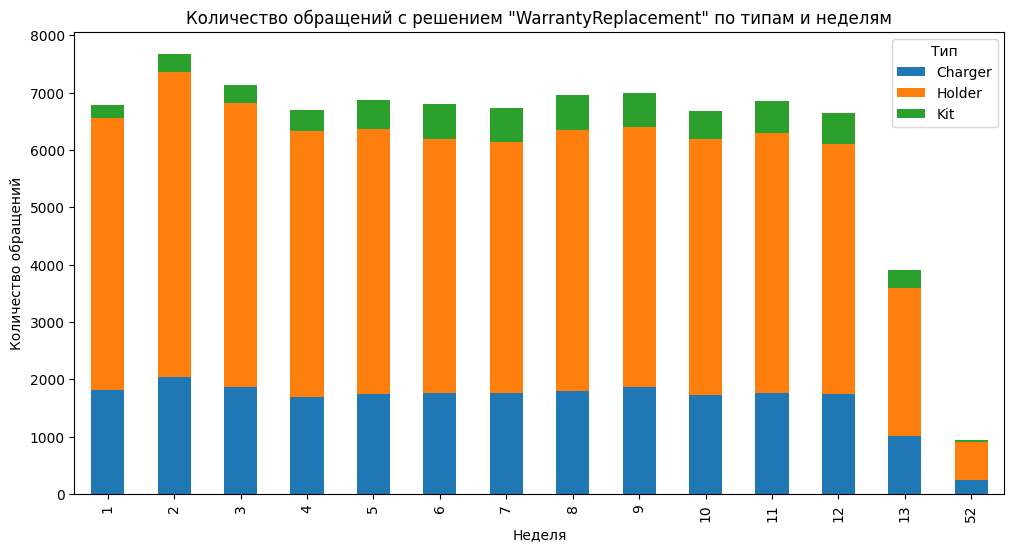

In [ ]:
import matplotlib.pyplot as plt
df['неделя'] = df['дата_обращения'].dt.isocalendar().week
df_warranty = df[df['решение'] == 'WarrantyReplacement']
weekly_counts = df_warranty.groupby(['неделя', 'тип']).size().unstack(fill_value=0)
weekly_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Количество обращений с решением "WarrantyReplacement" по типам и неделям')
plt.xlabel('Неделя')
plt.ylabel('Количество обращений')
plt.legend(title='Тип')
plt.show()

In [ ]:
print(df['решение'].unique())

df['дата_обращения'] = pd.to_datetime(df['дата_обращения'], errors='coerce')
print(df['дата_обращения'].min(), df['дата_обращения'].max())

df_filtered = df[(df['дата_обращения'] >= '2022-01-01') & (df['дата_обращения'] <= '2022-03-31')]

print(f'Количество записей с января по март: {df_filtered.shape[0]}')

df_warranty = df_filtered[df_filtered['решение'].str.contains('WarrantyReplacement', na=False)]

unique_records = df_warranty['код_клиента'].nunique()

print(f'Количество уникальных записей, запрашивающих WarrantyReplacement с января по март: {unique_records}')

['WarrantyReplacement' 'OverrideReplacement' 'GoodwillReplacement']
2022-01-01 00:00:00 2022-03-31 00:00:00
Количество записей с января по март: 88107
Количество уникальных записей, запрашивающих WarrantyReplacement с января по март: 74646


In [ ]:
df['дата_обращения'] = pd.to_datetime(df['дата_обращения'])
df_february = df[(df['дата_обращения'] >= '2022-02-01') & (df['дата_обращения'] <= '2022-02-28')]
df_warranty_february = df_february[df_february['решение'] == 'WarrantyReplacement']
print (df_warranty_february)
total_warranty_replacements = df_warranty_february.shape[0]
unique_clients = df_warranty_february['код_клиента'].nunique()
average_replacements_per_client = total_warranty_replacements / unique_clients if unique_clients else 0

print(f'Среднее количество решений "WarrantyReplacement" на одного клиента в феврале: {average_replacements_per_client}')



         код_клиента  код_обращения дата_обращения              решение  \
1      CUST-10041283  REPL-23930020     2022-02-08  WarrantyReplacement   
7      CUST-10051934  REPL-23892623     2022-02-04  WarrantyReplacement   
8      CUST-10051934  REPL-23892502     2022-02-04  WarrantyReplacement   
19     CUST-10075332  REPL-24080531     2022-02-20  WarrantyReplacement   
21     CUST-10080044  REPL-24112306     2022-02-22  WarrantyReplacement   
...              ...            ...            ...                  ...   
86773  CUST-33858085  REPL-24180962     2022-02-28  WarrantyReplacement   
86774  CUST-33858091  REPL-24180925     2022-02-28  WarrantyReplacement   
86775  CUST-33858100  REPL-24181086     2022-02-28  WarrantyReplacement   
86784  CUST-33858437  REPL-24182056     2022-02-28  WarrantyReplacement   
86785  CUST-33858492  REPL-24182240     2022-02-28  WarrantyReplacement   

      категория  возраст_устройства      платформа            цвет      тип  \
1          B101     

In [ ]:
color_counts = df['цвет'].value_counts()
print(color_counts)
platform_counts = df['платформа'].value_counts()
print(platform_counts)


цвет
Blue                23365
Black               21834
Gold                17483
White                8026
Stone Grey           5452
Cosmic Blue          4983
Navy                 2003
Passion Red          1856
Moonlight Silver     1168
The We Edition       1133
Absolut red           182
Copper                162
Cloud blue            146
Frosted Red           124
Lucid Teal            117
Festa pink             42
Graphite               29
Pink                    2
Name: count, dtype: int64
платформа
IQOS 3 DUOS      73821
lil SOLID 2.0    10805
lil SOLID         1922
IQOS 2.4/2.4+     1447
IQOS 3.0            81
IQOS 3 MULTI        31
Name: count, dtype: int64


In [ ]:
df_jan_to_mar = df[(df['дата_обращения'] >= '2022-01-01') & (df['дата_обращения'] <= '2022-03-31')]
average_device_age = df_jan_to_mar['возраст_устройства'].mean()
print(f'Средний возраст устройств за январь-март 2022 года: {average_device_age}')


Средний возраст устройств за январь-март 2022 года: 11.231495043771503


In [ ]:
warranty_df = df[df['решение'] == 'WarrantyReplacement']
warranty_by_city = warranty_df.groupby('город').size().reset_index(name='количество')
warranty_by_city_sorted = warranty_by_city.sort_values('количество', ascending=False)
print(warranty_by_city_sorted)


              город  количество
275          Moscow       17040
434  St. Petersburg        5084
379   Rostov-on-Don        2832
321     Novosibirsk        2660
108    Ekaterinburg        2657
..              ...         ...
342        Osinniki           1
484       Uryupinsk           1
268       Millerovo           1
206          Kotlas           1
73          Buzuluk           1

[552 rows x 2 columns]


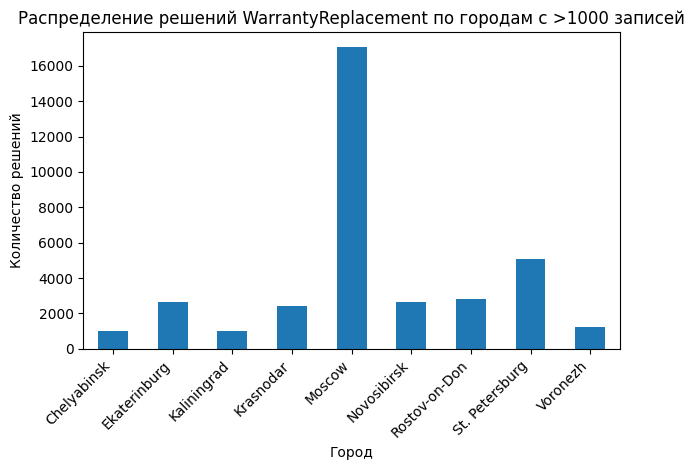

In [ ]:
warranty_df = df[df['решение'] == 'WarrantyReplacement']
warranty_by_city = warranty_df.groupby('город').size()
warranty_by_city = warranty_by_city[warranty_by_city > 1000]
warranty_by_city.plot(kind='bar')

plt.title('Распределение решений WarrantyReplacement по городам с >1000 записей')
plt.xlabel('Город')
plt.ylabel('Количество решений')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
warranty_df = df[df['решение'] == 'WarrantyReplacement']
warranty_with_delivery = warranty_df[warranty_df['тип_доставки'].notna()]
count_warranty_with_delivery = warranty_with_delivery.shape[0]
print(f"Количество замен с доставкой: {count_warranty_with_delivery}")


Количество замен с доставкой: 7343


In [ ]:
warranty_df = df[df['решение'] == 'WarrantyReplacement']
total_warranty = warranty_df.shape[0]
warranty_with_delivery = warranty_df[warranty_df['тип_доставки'].notna()]
count_warranty_with_delivery = warranty_with_delivery.shape[0]
percentage_with_delivery = (count_warranty_with_delivery / total_warranty) * 100

print(f"Процент змен с доставкой: {percentage_with_delivery:.2f}%")


Процент змен с доставкой: 8.38%


In [ ]:
total_decisions = df['решение'].count()
warranty_decisions = df[df['решение'] == 'WarrantyReplacement']['решение'].count()
percentage_warranty = (warranty_decisions / total_decisions) * 100

print(f"99,46: {percentage_warranty:.2f}%")



Процент записей 'WarrantyReplacement' от всех решений: 99.46%


In [ ]:
filtered_df = df[(df['дата_обращения'] >= '2022-01-01') & (df['дата_обращения'] <= '2022-03-31')]
channel_counts = filtered_df['канал'].value_counts()
channel_ratio = channel_counts / channel_counts.sum()

print(channel_ratio)


канал
BR    0.682420
TT    0.234090
SP    0.046341
EX    0.037148
Name: count, dtype: float64


In [ ]:
nps_counts = df['nps'].value_counts()
nps_percentage = (nps_counts / nps_counts.sum()) * 100
nps_percentage_df = pd.DataFrame({'NPS': nps_percentage.index, 'Процент': nps_percentage.values})

print(nps_percentage_df)


    NPS    Процент
0  Detr  64.081174
1  Prom  18.040564
2  Neut  17.878262
